In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
df = pd.read_csv('stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]
df.head(10)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python
5,how to give alias name for my website i have ...,asp.net
6,window.open() returns null in angularjs it wo...,angularjs
7,identifying server timeout quickly in iphone ...,iphone
8,unknown method key error in rails 2.3.8 unit ...,ruby-on-rails
9,from the include how to show and hide the con...,angularjs


у нас более 10 миллионов данных

In [3]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

10286120

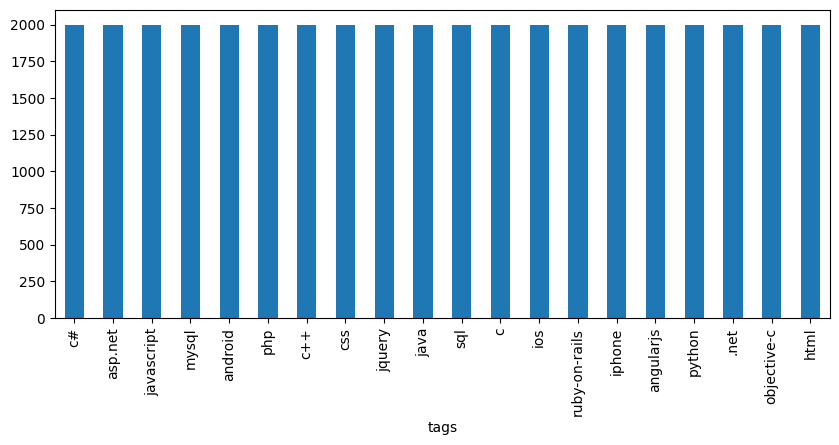

In [4]:
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [15]:
# функция для просмотра инфы в тэге

def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
    return example[0]

In [6]:
print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

 Видим, что текст нужно почистить

In [8]:
nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pzherdev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['post'] = df['post'].apply(clean_text)

/tmp/ipykernel_137608/3432917078.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


In [16]:
type(print_plot(10))

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#


str

In [18]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words_simple(docs):
    """
    Простая реализация мешка слов для списка документов (предложений).
    """
    # Токенизация документов
    tokenized_docs = [doc.split() for doc in docs]
    
    # Создание множества всех уникальных слов
    dictionary = set(word for doc in tokenized_docs for word in doc)
    
    # Создание BoW для каждого документа
    bow = [Counter(doc) for doc in tokenized_docs]
    
    for i, doc in enumerate(bow):
        print(f"Документ {i}: {doc}.")

bag_of_words_simple([print_plot(10), print_plot(11)])

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#
install ipa jailbroken iphone air apple certificate install ipa deb files iphone device directly without user interference ie user use terminal third party tool like cyberduck iexplorer install file entire process automated exactly cydia
Tag: ios
Документ 0: Counter({'interface': 7, 'function': 4, 'class': 4, 'need': 3, 'use': 3, 'idemo': 3, 'public': 3, 'void': 3, 'show': 3, 'body': 3, 'responsewrite': 3, 'want': 2, 'using': 2, 'comes': 2, 'myclass2': 2, 'c#': 1, 'possible': 1, 'duplicate': 1, 'would': 1, 'int

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(docs):
    """
    Реализация TF-IDF с использованием scikit-learn.
    """
    # Инициализация vectorizer
    vectorizer = TfidfVectorizer()
    
    # Вычисление TF-IDF
    tfidf_matrix = vectorizer.fit_transform(docs)
    
    # Вывод результатов
    print("Фичи (слова/термины):")
    print(vectorizer.get_feature_names_out())
    
    print("\nTF-IDF матрица (первые два документа):")
    print(tfidf_matrix.toarray()[:2, :])  # Печатаем данные для первых двух документов

tf_idf([print_plot(10), print_plot(11)])


need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#
install ipa jailbroken iphone air apple certificate install ipa deb files iphone device directly without user interference ie user use terminal third party tool like cyberduck iexplorer install file entire process automated exactly cydia
Tag: ios
Фичи (слова/термины):
['achieved' 'air' 'apple' 'automated' 'body' 'certificate' 'class'
 'classes' 'comes' 'cyberduck' 'cydia' 'deb' 'device' 'different'
 'directly' 'duplicate' 'entire' 'even' 'exactly' 'example' 'file' 'files'
 'first' 'function' 'idemo' 'ie' 'iexpl

Уже лучше. Можем обучаться)

In [22]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [24]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred,target_names=my_tags))

               precision    recall  f1-score   support

         java       0.63      0.65      0.64       613
         html       0.94      0.86      0.90       620
      asp.net       0.87      0.92      0.90       587
           c#       0.70      0.77      0.73       586
ruby-on-rails       0.73      0.87      0.79       599
       jquery       0.72      0.51      0.60       589
        mysql       0.77      0.74      0.75       594
          php       0.69      0.89      0.78       610
          ios       0.63      0.59      0.61       617
   javascript       0.57      0.65      0.60       587
       python       0.70      0.50      0.59       611
            c       0.79      0.79      0.79       594
          css       0.84      0.59      0.69       619
      android       0.65      0.84      0.74       574
       iphone       0.64      0.83      0.72       584
          sql       0.66      0.64      0.65       578
  objective-c       0.79      0.77      0.78       591
         

 # Линейный градиентный спуск

In [25]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [26]:
%%time

y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred,target_names=my_tags))

               precision    recall  f1-score   support

         java       0.74      0.67      0.70       613
         html       0.84      0.94      0.89       620
      asp.net       0.88      0.95      0.92       587
           c#       0.81      0.80      0.80       586
ruby-on-rails       0.73      0.88      0.80       599
       jquery       0.78      0.39      0.52       589
        mysql       0.81      0.68      0.74       594
          php       0.71      0.95      0.81       610
          ios       0.83      0.56      0.67       617
   javascript       0.72      0.58      0.64       587
       python       0.71      0.66      0.68       611
            c       0.80      0.88      0.83       594
          css       0.77      0.79      0.78       619
      android       0.84      0.86      0.85       574
       iphone       0.82      0.81      0.81       584
          sql       0.71      0.68      0.69       578
  objective-c       0.81      0.90      0.85       591
         

In [27]:


from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [28]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7814166666666666
               precision    recall  f1-score   support

         java       0.67      0.63      0.65       613
         html       0.92      0.90      0.91       620
      asp.net       0.98      0.94      0.96       587
           c#       0.75      0.75      0.75       586
ruby-on-rails       0.77      0.83      0.80       599
       jquery       0.61      0.57      0.59       589
        mysql       0.77      0.76      0.76       594
          php       0.83      0.86      0.84       610
          ios       0.68      0.73      0.70       617
   javascript       0.59      0.60      0.59       587
       python       0.65      0.63      0.64       611
            c       0.83      0.82      0.82       594
          css       0.77      0.77      0.77       619
      android       0.86      0.84      0.85       574
       iphone       0.82      0.84      0.83       584
          sql       0.66      0.66      0.66       578
  objective-c       0.83      0.82  

In [3]:
%%time
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

Wall time: 1min 32s


In [4]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.vectors_norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [5]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [6]:
nltk.download('punkt')

train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

<ipython-input-4-933aa279cb16>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


In [57]:
import xgboost as xgb
import catboost as cbm
import lightgbm as lgb

C:\Users\pavel\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\pavel\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\pavel\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\pavel\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be remove

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['tags'])
y_pred = logreg.predict(X_test_word_average)

C:\Users\pavel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

accuracy 0.6184166666666666
               precision    recall  f1-score   support

         java       0.56      0.55      0.56       613
         html       0.75      0.71      0.73       620
      asp.net       0.65      0.61      0.63       587
           c#       0.62      0.62      0.62       586
ruby-on-rails       0.66      0.76      0.71       599
       jquery       0.38      0.34      0.36       589
        mysql       0.66      0.61      0.63       594
          php       0.68      0.78      0.73       610
          ios       0.56      0.58      0.57       617
   javascript       0.51      0.47      0.49       587
       python       0.55      0.49      0.52       611
            c       0.63      0.58      0.60       594
          css       0.61      0.58      0.59       619
      android       0.55      0.55      0.55       574
       iphone       0.67      0.70      0.69       584
          sql       0.40      0.45      0.42       578
  objective-c       0.66      0.72  

In [59]:
cbmC = cbm.CatBoostClassifier(learning_rate=0.1, early_stopping_rounds=15, eval_metric='AUC')
cbmC.fit(X_train_word_average, train.tags, eval_set=(X_test_word_average, test.tags), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7270538	best: 0.7270538 (0)	total: 887ms	remaining: 14m 46s
1:	test: 0.7753773	best: 0.7753773 (1)	total: 1.66s	remaining: 13m 48s
2:	test: 0.7989929	best: 0.7989929 (2)	total: 2.42s	remaining: 13m 22s
3:	test: 0.8182883	best: 0.8182883 (3)	total: 3.16s	remaining: 13m 7s
4:	test: 0.8259404	best: 0.8259404 (4)	total: 3.9s	remaining: 12m 57s
5:	test: 0.8382007	best: 0.8382007 (5)	total: 4.67s	remaining: 12m 53s
6:	test: 0.8500690	best: 0.8500690 (6)	total: 5.44s	remaining: 12m 51s
7:	test: 0.8564491	best: 0.8564491 (7)	total: 6.2s	remaining: 12m 48s
8:	test: 0.8637639	best: 0.8637639 (8)	total: 6.93s	remaining: 12m 42s
9:	test: 0.8691592	best: 0.8691592 (9)	total: 7.71s	remaining: 12m 42s
10:	test: 0.8764187	best: 0.8764187 (10)	total: 8.43s	remaining: 12m 37s
11:	test: 0.8795408	best: 0.8795408 (11)	total: 9.16s	remaining: 12m 34s
12:	test: 0.8829171	best: 0.8829171 (12)	total: 9.94s	remaining: 12m 34s
13:	test: 0.8883668	best: 0.8883668 (13)	total: 10.7s	remaining: 12m 35s
1

113:	test: 0.9493422	best: 0.9493422 (113)	total: 1m 26s	remaining: 11m 15s
114:	test: 0.9495159	best: 0.9495159 (114)	total: 1m 27s	remaining: 11m 13s
115:	test: 0.9497583	best: 0.9497583 (115)	total: 1m 28s	remaining: 11m 13s
116:	test: 0.9499299	best: 0.9499299 (116)	total: 1m 29s	remaining: 11m 12s
117:	test: 0.9500470	best: 0.9500470 (117)	total: 1m 29s	remaining: 11m 11s
118:	test: 0.9502545	best: 0.9502545 (118)	total: 1m 30s	remaining: 11m 10s
119:	test: 0.9504055	best: 0.9504055 (119)	total: 1m 31s	remaining: 11m 9s
120:	test: 0.9505467	best: 0.9505467 (120)	total: 1m 32s	remaining: 11m 8s
121:	test: 0.9506559	best: 0.9506559 (121)	total: 1m 32s	remaining: 11m 7s
122:	test: 0.9508082	best: 0.9508082 (122)	total: 1m 33s	remaining: 11m 6s
123:	test: 0.9510372	best: 0.9510372 (123)	total: 1m 34s	remaining: 11m 5s
124:	test: 0.9511568	best: 0.9511568 (124)	total: 1m 34s	remaining: 11m 4s
125:	test: 0.9513256	best: 0.9513256 (125)	total: 1m 35s	remaining: 11m 3s
126:	test: 0.951448

222:	test: 0.9603308	best: 0.9603308 (222)	total: 2m 45s	remaining: 9m 38s
223:	test: 0.9604396	best: 0.9604396 (223)	total: 2m 46s	remaining: 9m 37s
224:	test: 0.9604933	best: 0.9604933 (224)	total: 2m 47s	remaining: 9m 36s
225:	test: 0.9605402	best: 0.9605402 (225)	total: 2m 48s	remaining: 9m 35s
226:	test: 0.9605828	best: 0.9605828 (226)	total: 2m 48s	remaining: 9m 34s
227:	test: 0.9606374	best: 0.9606374 (227)	total: 2m 49s	remaining: 9m 33s
228:	test: 0.9606632	best: 0.9606632 (228)	total: 2m 50s	remaining: 9m 32s
229:	test: 0.9607186	best: 0.9607186 (229)	total: 2m 50s	remaining: 9m 32s
230:	test: 0.9607806	best: 0.9607806 (230)	total: 2m 51s	remaining: 9m 31s
231:	test: 0.9608126	best: 0.9608126 (231)	total: 2m 52s	remaining: 9m 30s
232:	test: 0.9608668	best: 0.9608668 (232)	total: 2m 52s	remaining: 9m 29s
233:	test: 0.9609244	best: 0.9609244 (233)	total: 2m 53s	remaining: 9m 28s
234:	test: 0.9609901	best: 0.9609901 (234)	total: 2m 54s	remaining: 9m 27s
235:	test: 0.9610289	best

332:	test: 0.9644858	best: 0.9644858 (332)	total: 4m 3s	remaining: 8m 7s
333:	test: 0.9645333	best: 0.9645333 (333)	total: 4m 4s	remaining: 8m 7s
334:	test: 0.9645533	best: 0.9645533 (334)	total: 4m 4s	remaining: 8m 6s
335:	test: 0.9645879	best: 0.9645879 (335)	total: 4m 5s	remaining: 8m 5s
336:	test: 0.9646234	best: 0.9646234 (336)	total: 4m 6s	remaining: 8m 4s
337:	test: 0.9646416	best: 0.9646416 (337)	total: 4m 6s	remaining: 8m 3s
338:	test: 0.9646450	best: 0.9646450 (338)	total: 4m 7s	remaining: 8m 2s
339:	test: 0.9646882	best: 0.9646882 (339)	total: 4m 8s	remaining: 8m 2s
340:	test: 0.9647201	best: 0.9647201 (340)	total: 4m 9s	remaining: 8m 1s
341:	test: 0.9647704	best: 0.9647704 (341)	total: 4m 9s	remaining: 8m
342:	test: 0.9647868	best: 0.9647868 (342)	total: 4m 10s	remaining: 7m 59s
343:	test: 0.9648037	best: 0.9648037 (343)	total: 4m 11s	remaining: 7m 59s
344:	test: 0.9648617	best: 0.9648617 (344)	total: 4m 12s	remaining: 7m 58s
345:	test: 0.9648730	best: 0.9648730 (345)	total

443:	test: 0.9667992	best: 0.9667992 (443)	total: 5m 26s	remaining: 6m 49s
444:	test: 0.9668151	best: 0.9668151 (444)	total: 5m 27s	remaining: 6m 48s
445:	test: 0.9668329	best: 0.9668329 (445)	total: 5m 28s	remaining: 6m 47s
446:	test: 0.9668440	best: 0.9668440 (446)	total: 5m 28s	remaining: 6m 46s
447:	test: 0.9668539	best: 0.9668539 (447)	total: 5m 29s	remaining: 6m 46s
448:	test: 0.9668687	best: 0.9668687 (448)	total: 5m 30s	remaining: 6m 45s
449:	test: 0.9668943	best: 0.9668943 (449)	total: 5m 31s	remaining: 6m 44s
450:	test: 0.9669116	best: 0.9669116 (450)	total: 5m 31s	remaining: 6m 43s
451:	test: 0.9669214	best: 0.9669214 (451)	total: 5m 32s	remaining: 6m 43s
452:	test: 0.9669405	best: 0.9669405 (452)	total: 5m 33s	remaining: 6m 42s
453:	test: 0.9669500	best: 0.9669500 (453)	total: 5m 33s	remaining: 6m 41s
454:	test: 0.9669522	best: 0.9669522 (454)	total: 5m 34s	remaining: 6m 40s
455:	test: 0.9669751	best: 0.9669751 (455)	total: 5m 35s	remaining: 6m 39s
456:	test: 0.9669821	best

553:	test: 0.9683733	best: 0.9683733 (553)	total: 6m 43s	remaining: 5m 25s
554:	test: 0.9683865	best: 0.9683865 (554)	total: 6m 44s	remaining: 5m 24s
555:	test: 0.9684076	best: 0.9684076 (555)	total: 6m 45s	remaining: 5m 23s
556:	test: 0.9684194	best: 0.9684194 (556)	total: 6m 46s	remaining: 5m 22s
557:	test: 0.9684358	best: 0.9684358 (557)	total: 6m 46s	remaining: 5m 22s
558:	test: 0.9684703	best: 0.9684703 (558)	total: 6m 47s	remaining: 5m 21s
559:	test: 0.9684809	best: 0.9684809 (559)	total: 6m 48s	remaining: 5m 20s
560:	test: 0.9684965	best: 0.9684965 (560)	total: 6m 49s	remaining: 5m 20s
561:	test: 0.9685041	best: 0.9685041 (561)	total: 6m 49s	remaining: 5m 19s
562:	test: 0.9685117	best: 0.9685117 (562)	total: 6m 50s	remaining: 5m 18s
563:	test: 0.9685178	best: 0.9685178 (563)	total: 6m 51s	remaining: 5m 18s
564:	test: 0.9685280	best: 0.9685280 (564)	total: 6m 52s	remaining: 5m 17s
565:	test: 0.9685535	best: 0.9685535 (565)	total: 6m 52s	remaining: 5m 16s
566:	test: 0.9685629	best

663:	test: 0.9695710	best: 0.9695725 (662)	total: 8m 2s	remaining: 4m 4s
664:	test: 0.9695724	best: 0.9695725 (662)	total: 8m 3s	remaining: 4m 3s
665:	test: 0.9695680	best: 0.9695725 (662)	total: 8m 3s	remaining: 4m 2s
666:	test: 0.9695832	best: 0.9695832 (666)	total: 8m 4s	remaining: 4m 1s
667:	test: 0.9695891	best: 0.9695891 (667)	total: 8m 5s	remaining: 4m 1s
668:	test: 0.9695862	best: 0.9695891 (667)	total: 8m 5s	remaining: 4m
669:	test: 0.9696008	best: 0.9696008 (669)	total: 8m 6s	remaining: 3m 59s
670:	test: 0.9696182	best: 0.9696182 (670)	total: 8m 7s	remaining: 3m 58s
671:	test: 0.9696256	best: 0.9696256 (671)	total: 8m 7s	remaining: 3m 58s
672:	test: 0.9696299	best: 0.9696299 (672)	total: 8m 8s	remaining: 3m 57s
673:	test: 0.9696334	best: 0.9696334 (673)	total: 8m 9s	remaining: 3m 56s
674:	test: 0.9696369	best: 0.9696369 (674)	total: 8m 10s	remaining: 3m 55s
675:	test: 0.9696421	best: 0.9696421 (675)	total: 8m 10s	remaining: 3m 55s
676:	test: 0.9696500	best: 0.9696500 (676)	to

773:	test: 0.9704915	best: 0.9704939 (771)	total: 9m 22s	remaining: 2m 44s
774:	test: 0.9704961	best: 0.9704961 (774)	total: 9m 23s	remaining: 2m 43s
775:	test: 0.9705081	best: 0.9705081 (775)	total: 9m 24s	remaining: 2m 42s
776:	test: 0.9705126	best: 0.9705126 (776)	total: 9m 24s	remaining: 2m 42s
777:	test: 0.9705174	best: 0.9705174 (777)	total: 9m 25s	remaining: 2m 41s
778:	test: 0.9705304	best: 0.9705304 (778)	total: 9m 26s	remaining: 2m 40s
779:	test: 0.9705418	best: 0.9705418 (779)	total: 9m 27s	remaining: 2m 39s
780:	test: 0.9705491	best: 0.9705491 (780)	total: 9m 27s	remaining: 2m 39s
781:	test: 0.9705680	best: 0.9705680 (781)	total: 9m 28s	remaining: 2m 38s
782:	test: 0.9705708	best: 0.9705708 (782)	total: 9m 29s	remaining: 2m 37s
783:	test: 0.9705701	best: 0.9705708 (782)	total: 9m 30s	remaining: 2m 37s
784:	test: 0.9705766	best: 0.9705766 (784)	total: 9m 30s	remaining: 2m 36s
785:	test: 0.9705677	best: 0.9705766 (784)	total: 9m 31s	remaining: 2m 35s
786:	test: 0.9705708	best

882:	test: 0.9709969	best: 0.9709969 (882)	total: 10m 42s	remaining: 1m 25s
883:	test: 0.9710033	best: 0.9710033 (883)	total: 10m 42s	remaining: 1m 24s
884:	test: 0.9710036	best: 0.9710036 (884)	total: 10m 43s	remaining: 1m 23s
885:	test: 0.9710074	best: 0.9710074 (885)	total: 10m 44s	remaining: 1m 22s
886:	test: 0.9710184	best: 0.9710184 (886)	total: 10m 44s	remaining: 1m 22s
887:	test: 0.9710260	best: 0.9710260 (887)	total: 10m 45s	remaining: 1m 21s
888:	test: 0.9710350	best: 0.9710350 (888)	total: 10m 46s	remaining: 1m 20s
889:	test: 0.9710371	best: 0.9710371 (889)	total: 10m 47s	remaining: 1m 19s
890:	test: 0.9710490	best: 0.9710490 (890)	total: 10m 47s	remaining: 1m 19s
891:	test: 0.9710540	best: 0.9710540 (891)	total: 10m 48s	remaining: 1m 18s
892:	test: 0.9710643	best: 0.9710643 (892)	total: 10m 49s	remaining: 1m 17s
893:	test: 0.9710724	best: 0.9710724 (893)	total: 10m 49s	remaining: 1m 17s
894:	test: 0.9710648	best: 0.9710724 (893)	total: 10m 50s	remaining: 1m 16s
895:	test: 0

992:	test: 0.9716210	best: 0.9716212 (991)	total: 11m 59s	remaining: 5.07s
993:	test: 0.9716330	best: 0.9716330 (993)	total: 12m	remaining: 4.35s
994:	test: 0.9716387	best: 0.9716387 (994)	total: 12m 1s	remaining: 3.62s
995:	test: 0.9716441	best: 0.9716441 (995)	total: 12m 1s	remaining: 2.9s
996:	test: 0.9716365	best: 0.9716441 (995)	total: 12m 2s	remaining: 2.17s
997:	test: 0.9716456	best: 0.9716456 (997)	total: 12m 3s	remaining: 1.45s
998:	test: 0.9716459	best: 0.9716459 (998)	total: 12m 4s	remaining: 725ms
999:	test: 0.9716489	best: 0.9716489 (999)	total: 12m 4s	remaining: 0us

bestTest = 0.9716489016
bestIteration = 999



In [60]:
y_pred = cbmC.predict(X_test_word_average)

print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

accuracy 0.5698333333333333
               precision    recall  f1-score   support

         java       0.50      0.55      0.52       613
         html       0.76      0.61      0.68       620
      asp.net       0.61      0.57      0.59       587
           c#       0.56      0.57      0.56       586
ruby-on-rails       0.65      0.74      0.69       599
       jquery       0.34      0.33      0.33       589
        mysql       0.65      0.56      0.60       594
          php       0.67      0.74      0.70       610
          ios       0.50      0.51      0.51       617
   javascript       0.44      0.46      0.45       587
       python       0.48      0.47      0.48       611
            c       0.56      0.52      0.54       594
          css       0.58      0.52      0.55       619
      android       0.53      0.51      0.52       574
       iphone       0.60      0.61      0.61       584
          sql       0.33      0.40      0.36       578
  objective-c       0.62      0.60  

# Doc2vec and Logistic Regression

In [17]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [22]:
doc2vec = Doc2Vec()

In [25]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [27]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|███████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 3334171.19it/s]


In [28]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|███████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 3636390.75it/s]


In [29]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [30]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [31]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

C:\Users\pavel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0, n_jobs=1)

In [32]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

C:\Users\pavel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print(classification_report(y_test, y_pred,target_names=my_tags))

               precision    recall  f1-score   support

         java       0.66      0.64      0.65       589
         html       0.88      0.88      0.88       661
      asp.net       0.92      0.94      0.93       606
           c#       0.77      0.76      0.76       613
ruby-on-rails       0.83      0.85      0.84       601
       jquery       0.68      0.68      0.68       585
        mysql       0.83      0.77      0.80       621
          php       0.83      0.84      0.84       587
          ios       0.65      0.68      0.67       560
   javascript       0.63      0.62      0.62       611
       python       0.62      0.64      0.63       593
            c       0.77      0.81      0.79       581
          css       0.81      0.75      0.78       608
      android       0.86      0.85      0.86       593
       iphone       0.82      0.81      0.82       592
          sql       0.66      0.63      0.65       597
  objective-c       0.83      0.84      0.84       604
         

# BoW With Keras

In [35]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [36]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 28000
Test size: 12000


In [37]:
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

In [38]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [40]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [46]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [48]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [49]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (28000, 1000)
x_test shape: (12000, 1000)
y_train shape: (28000, 20)
y_test shape: (12000, 20)


In [54]:
batch_size = 32
epochs = 5

In [50]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/5
788/788 [==============================] - 5s 6ms/step - loss: 0.4453 - accuracy: 0.8535 - val_loss: 0.6204 - val_accuracy: 0.8114
Epoch 2/5
788/788 [==============================] - 5s 6ms/step - loss: 0.3795 - accuracy: 0.8758 - val_loss: 0.6354 - val_accuracy: 0.8096
Epoch 3/5
788/788 [==============================] - 5s 6ms/step - loss: 0.3214 - accuracy: 0.8935 - val_loss: 0.6669 - val_accuracy: 0.8050
Epoch 4/5
788/788 [==============================] - 5s 6ms/step - loss: 0.2643 - accuracy: 0.9118 - val_loss: 0.6885 - val_accuracy: 0.8064
Epoch 5/5
788/788 [==============================] - 5s 6ms/step - loss: 0.2184 - accuracy: 0.9275 - val_loss: 0.7096 - val_accuracy: 0.8050


In [56]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

375/375 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.8030
Test accuracy: 0.8029999732971191
